Final parameters: [5.28014229e-06 6.95286500e-01]


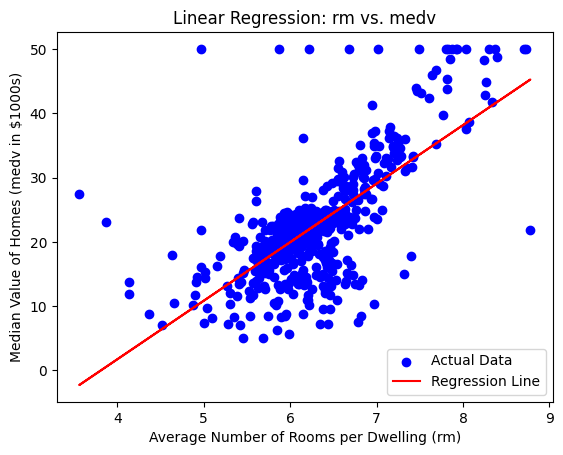

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("BostonHousing.csv")

X = data['rm'].values
y = data['medv'].values
X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)
X = (X - X_mean) / X_std
y = (y - y_mean) / y_std
X = np.c_[np.ones(X.shape[0]), X]
theta = np.random.randn(2)
learning_rate = 0.01
epochs = 1000

m = len(y)
for _ in range(epochs):
    predictions = X.dot(theta)
    errors = predictions - y
    gradient = (1/m) * X.T.dot(errors)
    theta -= learning_rate * gradient

print(f"Final parameters: {theta}")
plt.scatter(data['rm'], data['medv'], color='blue', label='Actual Data')
plt.plot(data['rm'], (theta[0] + theta[1] * (data['rm'] - X_mean) / X_std) * y_std + y_mean, color='red', label='Regression Line')
plt.xlabel('Average Number of Rooms per Dwelling (rm)')
plt.ylabel('Median Value of Homes (medv in $1000s)')
plt.title('Linear Regression: rm vs. medv')
plt.legend()
plt.show()

Final parameters: [-0.50581227  1.60093126]


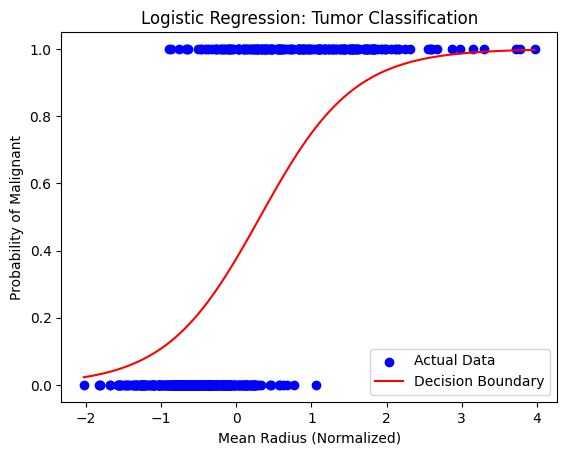

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("breast-cancer.csv")

X = data['radius_mean'].values
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0).values
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        theta -= (learning_rate / m) * X.T.dot(errors)
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

theta = np.zeros(X.shape[1])
learning_rate = 0.01
epochs = 1000
theta, cost_history = gradient_descent(X, y, theta, learning_rate, epochs)

print(f"Final parameters: {theta}")
plt.scatter(X[:, 1], y, color='blue', label='Actual Data')
x_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_vals = sigmoid(theta[0] + theta[1] * x_vals)
plt.plot(x_vals, y_vals, color='red', label='Decision Boundary')
plt.xlabel('Mean Radius (Normalized)')
plt.ylabel('Probability of Malignant')
plt.title('Logistic Regression: Tumor Classification')
plt.legend()
plt.show()